# End-to-End Exploratory Data Analysis (EDA) — NumPy, Pandas, Matplotlib

**Dataset:** `banking_dataset.csv`  
**Goal:** Perform a complete, reproducible EDA using only NumPy, Pandas, and Matplotlib—no seaborn.  
**Structure:** Each section contains (1) a markdown explanation of what we’re doing, (2) a code cell, and (3) a short explanation of the outputs.

---


## 0) Setup & Reproducibility

**What we’re doing**
- Importing core libraries: NumPy, Pandas, and Matplotlib.
- Setting a fixed random seed where needed to keep results reproducible.
- Reading the dataset from disk.
- Displaying the first 5 rows to quickly eyeball schema and example values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Paths
DATA_PATH = r"banking_dataset.csv"

# Read dataset
df = pd.read_csv(DATA_PATH)

# Peek
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
df.head()

Shape: (3287, 23)

Columns: ['Customer_ID', 'Account_Balance', 'Age', 'Gender', 'Marital_Status', 'Number_of_Dependents', 'Account_Type', 'Loan_Amount', 'Loan_Term_Months', 'Credit_Score', 'Annual_Income', 'Employment_Status', 'Education_Level', 'Home_Ownership', 'Monthly_Expenses', 'Transaction_Count', 'Last_Transaction_Date', 'Branch_Code', 'Account_Open_Date', 'Is_Active', 'Interest_Rate', 'Overdraft_Limit', 'Credit_Limit']


Customer_ID  Account_Balance  Age  Gender Marital_Status  \
0       221958     64590.227065   58    Male        Married   
1       771155      7420.505854   62  Female         Single   
2       231932     58418.394955   67  Female         Single   
3       465838     56586.974208   32    Male       Divorced   
4       359178     56505.349347   45  Female        Married   

   Number_of_Dependents   Account_Type   Loan_Amount  Loan_Term_Months  \
0                     3  Fixed Deposit  34619.081932               305   
1                     4  Fixed Deposit   3761.413396               156   
2                     4        Savings  23691.247471                38   
3                     4  Fixed Deposit  33297.871587                28   
4                     2  Fixed Deposit  38414.929480                74   

   Credit_Score  ...  Home_Ownership Monthly_Expenses Transaction_Count  \
0    624.090840  ...             Own      2017.550553                75   
1    396.267130  ...             Own      3663.605634                31   
2    673.835836  ...            Rent      3633.135562                53   
3    569.556145  ...            Rent      8288.122150                93   
4    360.475779  ...             Own      2349.264343                59   

  Last_Transaction_Date  Branch_Code  Account_Open_Date Is_Active  \
0            2020-01-01          123         2000-01-01      True   
1            2020-01-02          532         2000-01-02      True   
2            2020-01-03          728         2000-01-03     False   
3            2020-01-04          850         2000-01-04      True   
4            2020-01-05          577         2000-01-05     False   

   Interest_Rate Overdraft_Limit  Credit_Limit  
0      12.639632     3008.593540  21837.596582  
1       8.100292     2334.587749  38182.434429  
2       1.390386     4674.545550  45925.885233  
3       2.699170     2834.262899  32986.863839  
4      13.872315     4493.910025  19411.588330  

[5 rows x 23 columns]

**Explanation**
- `pd.read_csv` loads the data into a Pandas DataFrame `df`.
- We print the shape (rows, columns) and the list of columns for a quick overview.
- `df.head()` shows the first 5 rows to visually inspect values and potential data types.


## 1) Data Types, Basic Info, and Memory Footprint

**What we’re doing**
- Inspecting `df.info()` to understand column data types and nullability.
- Estimating memory usage to size the dataset and plan transformations.
- Creating lists of numeric vs. categorical-like columns for subsequent steps.


In [2]:
# Info & memory
print("=== DataFrame info ===")
df.info()

mem_mb = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nApprox. memory usage: {mem_mb:.2f} MB")

# Column type buckets
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical-like columns:", categorical_cols)

=== DataFrame info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            3287 non-null   int64  
 1   Account_Balance        3287 non-null   float64
 2   Age                    3287 non-null   int64  
 3   Gender                 3287 non-null   object 
 4   Marital_Status         3287 non-null   object 
 5   Number_of_Dependents   3287 non-null   int64  
 6   Account_Type           3287 non-null   object 
 7   Loan_Amount            3287 non-null   float64
 8   Loan_Term_Months       3287 non-null   int64  
 9   Credit_Score           3287 non-null   float64
 10  Annual_Income          3287 non-null   float64
 11  Employment_Status      3287 non-null   object 
 12  Education_Level        3287 non-null   object 
 13  Home_Ownership         3287 non-null   object 
 14  Monthly_Expenses       3287 non-n

**Explanation**
- `df.info()` reveals the dtypes (e.g., `int64`, `float64`, `object`) and non-null counts per column.
- Memory usage helps you decide whether to optimize dtypes (e.g., downcasting) if needed.
- We split columns into **numeric** and **categorical-like** buckets to drive later analyses and plots.


## 2) Missing Values Overview

**What we’re doing**
- Counting missing values per column and overall missing rate.
- Visualizing missingness as a simple bar chart (counts) with Matplotlib.


In [3]:
# Missing values summary
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)

summary_missing = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_pct': missing_pct
})
summary_missing = summary_missing[summary_missing['missing_count'] > 0]

display(summary_missing)

# Bar chart of missing counts
if not summary_missing.empty:
    plt.figure()
    summary_missing['missing_count'].plot(kind='bar')
    plt.title('Missing Values per Column (Count)')
    plt.xlabel('Column')
    plt.ylabel('Missing Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected.")

Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []

No missing values detected.


**Explanation**
- `df.isna().sum()` counts missing values per column; we also compute percentages.
- If any missing values exist, we plot counts using a simple bar chart.
- This surfaces columns that may require imputation, dropping, or domain-specific handling.


## 3) Duplicate Rows

**What we’re doing**
- Checking for exact duplicate rows.
- Previewing a few duplicates if they exist.


In [4]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

if dup_count > 0:
    display(df[df.duplicated()].head())

Duplicate rows: 0


**Explanation**
- `df.duplicated()` flags duplicate rows based on all columns by default.
- Duplicates might indicate ingestion issues or real-world repetition; handle according to context.


## 4) Descriptive Statistics

**What we’re doing**
- Generating descriptive stats for numeric columns (count, mean, std, percentiles).
- Summarizing categorical columns with unique counts and top-frequency categories.


In [5]:
# Numeric describe
if len(numeric_cols) > 0:
    display(df[numeric_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T)

# Categorical summaries
cat_summary = []
for col in categorical_cols:
    s = df[col].astype('object')
    cat_summary.append({
        'column': col,
        'n_unique': int(s.nunique(dropna=True)),
        'top': s.mode(dropna=True).iloc[0] if not s.mode(dropna=True).empty else None,
        'top_freq': int(s.value_counts(dropna=True).iloc[0]) if not s.value_counts(dropna=True).empty else 0
    })
if cat_summary:
    display(pd.DataFrame(cat_summary).sort_values('n_unique', ascending=False))

count           mean            std            min  \
Customer_ID           3287.0  549365.735321  262111.511272  100126.000000   
Account_Balance       3287.0   50055.484939   28460.989963    1001.151841   
Age                   3287.0      48.103742      17.830077      18.000000   
Number_of_Dependents  3287.0       2.009735       1.418477       0.000000   
Loan_Amount           3287.0   24887.258624   14161.185085     508.688035   
Loan_Term_Months      3287.0     183.437785     102.445370      12.000000   
Credit_Score          3287.0     575.439120     159.121825     300.530729   
Annual_Income         3287.0  106227.779918   55061.717963   10003.898413   
Monthly_Expenses      3287.0    5215.297626    2740.731541     500.926911   
Transaction_Count     3287.0      49.821722      28.886336       1.000000   
Branch_Code           3287.0     541.317311     260.523264     100.000000   
Interest_Rate         3287.0       8.066741       4.070140       1.001306   
Overdraft_Limit       3287.0    2753.150992    1282.940459     501.443722   
Credit_Limit          3287.0   25750.643526   14134.001115    1006.318647   

                                 1%             5%            25%  \
Customer_ID           109534.820000  144388.000000  314857.000000   
Account_Balance         2016.040195    6075.985036   25711.150053   
Age                       18.000000      20.000000      33.000000   
Number_of_Dependents       0.000000       0.000000       1.000000   
Loan_Amount             1098.498006    3060.754291   12508.030917   
Loan_Term_Months          15.000000      28.000000      93.000000   
Credit_Score             306.085475     328.378471     436.841877   
Annual_Income          11920.020625   19126.177507   59157.556620   
Monthly_Expenses         590.590749     979.485215    2827.697100   
Transaction_Count          1.000000       5.000000      25.000000   
Branch_Code              107.000000     144.000000     317.500000   
Interest_Rate              1.133303       1.769373       4.478973   
Overdraft_Limit          546.590573     742.183713    1657.284109   
Credit_Limit            1510.220785    3552.639735   13687.665133   

                                50%            75%            95%  \
Customer_ID           553761.000000  773389.000000  962257.100000   
Account_Balance        49793.593860   74560.697274   94827.467440   
Age                       48.000000      63.000000      76.000000   
Number_of_Dependents       2.000000       3.000000       4.000000   
Loan_Amount            24677.377092   36761.391360   47612.180974   
Loan_Term_Months         181.000000     274.000000     344.000000   
Credit_Score             571.030614     714.320473     823.501334   
Annual_Income         107278.622537  153809.842472  190671.590364   
Monthly_Expenses        5210.509481    7583.645941    9496.258077   
Transaction_Count         49.000000      76.000000      94.000000   
Branch_Code              527.000000     769.500000     953.700000   
Interest_Rate              8.174413      11.629719      14.276794   
Overdraft_Limit         2742.733228    3847.918940    4776.955293   
Credit_Limit           25698.485681   38042.252846   47427.990515   

                                99%            max  
Customer_ID           992300.640000  999885.000000  
Account_Balance        98820.897135   99956.212622  
Age                       79.000000      79.000000  
Number_of_Dependents       4.000000       4.000000  
Loan_Amount            49427.836253   49936.801100  
Loan_Term_Months         356.000000     359.000000  
Credit_Score             845.800491     849.902191  
Annual_Income         197619.394210  199979.301809  
Monthly_Expenses        9905.210270    9993.052509  
Transaction_Count         98.000000      99.000000  
Branch_Code              988.000000     998.000000  
Interest_Rate             14.885589      14.997160  
Overdraft_Limit         4947.150095    4999.140381  
Credit_Limit           49398.011781   49993.215274

column  n_unique         top  top_freq
7      Account_Open_Date      3287  2000-01-01         1
6  Last_Transaction_Date      3287  2020-01-01         1
4        Education_Level         5      Master       689
3      Employment_Status         4  Unemployed       840
1         Marital_Status         4     Widowed       874
5         Home_Ownership         3        Rent      1131
2           Account_Type         3     Current      1119
0                 Gender         2        Male      1712
8              Is_Active         2        True      1673

**Explanation**
- `describe()` for numeric columns shows central tendency and spread including extreme percentiles.
- For categorical-like columns, we compute number of unique values and the most frequent value (“top”).  
- This helps spot skew, imbalance, and high-cardinality variables.


## 5) Datetime Detection (Optional)

**What we’re doing**
- Attempting to parse `object` columns as datetimes (non-destructive; creates a separate view).
- If any date-like columns are found, we summarize min/max and extract components (year, month) for quick checks.


Detected date-like columns: ['Last_Transaction_Date', 'Account_Open_Date']

Summary for Last_Transaction_Date:
  min: 2020-01-01 00:00:00
  max: 2028-12-30 00:00:00


/tmp/ipython-input-3055506373.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[col], errors='raise', utc=False, infer_datetime_format=True)
/tmp/ipython-input-3055506373.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[col], errors='raise', utc=False, infer_datetime_format=True)
/tmp/ipython-input-3055506373.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  

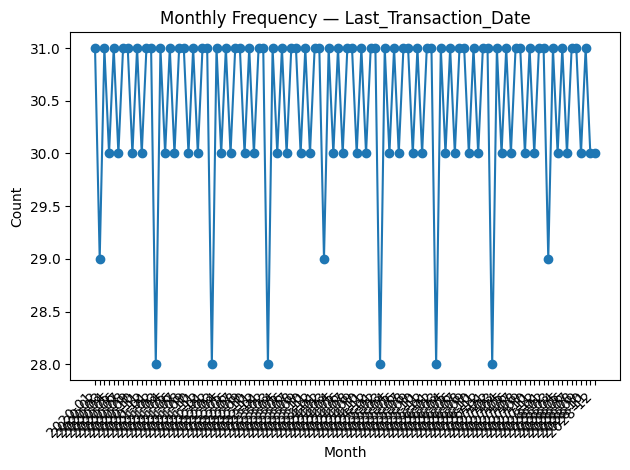


Summary for Account_Open_Date:
  min: 2000-01-01 00:00:00
  max: 2008-12-30 00:00:00


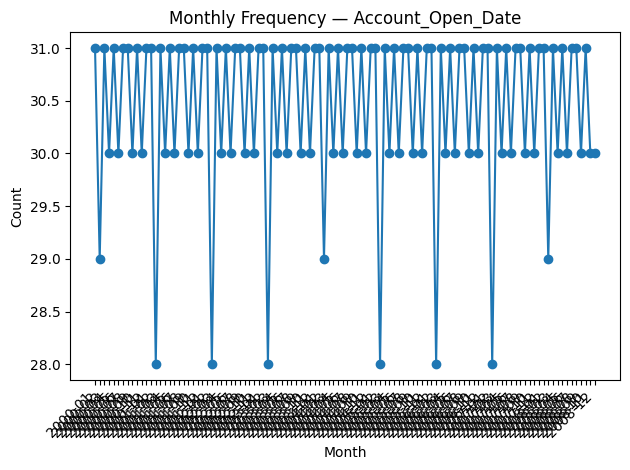

In [6]:
# Try parse object columns to datetimes (view-only)
date_candidates = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            parsed = pd.to_datetime(df[col], errors='raise', utc=False, infer_datetime_format=True)
            date_candidates.append(col)
        except Exception:
            pass

print("Detected date-like columns:", date_candidates)

if date_candidates:
    for col in date_candidates:
        ser = pd.to_datetime(df[col], errors='coerce')
        print(f"\nSummary for {col}:")
        print("  min:", ser.min())
        print("  max:", ser.max())
        # Simple monthly count plot if few years
        if ser.notna().sum() > 0:
            tmp = ser.dt.to_period('M').value_counts().sort_index()
            plt.figure()
            tmp.index.astype(str)
            plt.plot(tmp.index.astype(str), tmp.values, marker='o')
            plt.title(f'Monthly Frequency — {col}')
            plt.xlabel('Month')
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

**Explanation**
- We *attempt* to interpret `object` columns as date/time values without mutating `df`.
- When successful, we print min/max and show a monthly frequency line chart to spot seasonality or gaps.


## 6) Cardinality (Unique Values) per Column

**What we’re doing**
- Counting unique values per column.
- This identifies potential identifiers, high-cardinality categoricals, or constant columns.


n_unique
Account_Balance            3287
Overdraft_Limit            3287
Interest_Rate              3287
Monthly_Expenses           3287
Annual_Income              3287
Credit_Score               3287
Loan_Amount                3287
Credit_Limit               3287
Last_Transaction_Date      3287
Account_Open_Date          3287
Customer_ID                3283
Branch_Code                 884
Loan_Term_Months            348
Transaction_Count            99
Age                          62
Education_Level               5
Number_of_Dependents          5
Marital_Status                4
Employment_Status             4
Home_Ownership                3
Account_Type                  3
Gender                        2
Is_Active                     2

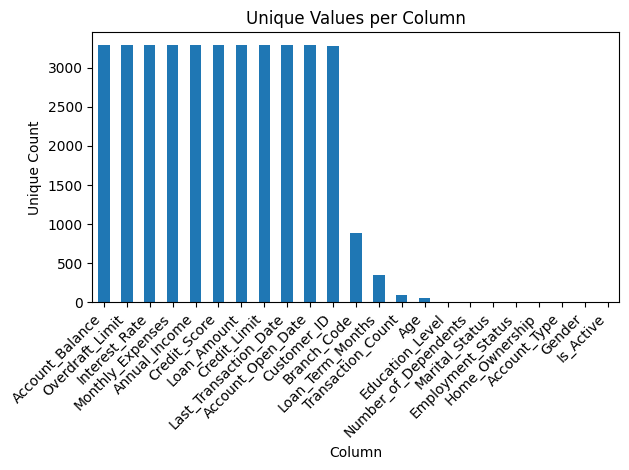

In [7]:
unique_counts = df.nunique(dropna=True).sort_values(ascending=False)
display(unique_counts.to_frame('n_unique'))

plt.figure()
unique_counts.plot(kind='bar')
plt.title('Unique Values per Column')
plt.xlabel('Column')
plt.ylabel('Unique Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Explanation**
- `df.nunique()` reveals the number of distinct values per column.
- Very high cardinality may require special handling; very low (1) might signal a non-informative column.


## 7) Outlier Detection (IQR Method)

**What we’re doing**
- For each numeric column, computing Q1, Q3, and IQR to flag outliers using the standard 1.5×IQR rule.
- Reporting counts of outliers per column and plotting boxplots to visualize spread and extreme points.


In [8]:
from collections import OrderedDict

outlier_summary = OrderedDict()
for col in numeric_cols:
    series = df[col].dropna()
    if series.empty:
        continue
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = series[(series < lower) | (series > upper)]
    outlier_summary[col] = {'q1': q1, 'q3': q3, 'iqr': iqr, 'lower': lower, 'upper': upper, 'n_outliers': int(outliers.shape[0])}

pd.DataFrame(outlier_summary).T.sort_values('n_outliers', ascending=False)

q1             q3            iqr  \
Customer_ID           314857.000000  773389.000000  458532.000000   
Account_Balance        25711.150053   74560.697274   48849.547221   
Age                       33.000000      63.000000      30.000000   
Number_of_Dependents       1.000000       3.000000       2.000000   
Loan_Amount            12508.030917   36761.391360   24253.360443   
Loan_Term_Months          93.000000     274.000000     181.000000   
Credit_Score             436.841877     714.320473     277.478597   
Annual_Income          59157.556620  153809.842472   94652.285851   
Monthly_Expenses        2827.697100    7583.645941    4755.948842   
Transaction_Count         25.000000      76.000000      51.000000   
Branch_Code              317.500000     769.500000     452.000000   
Interest_Rate              4.478973      11.629719       7.150745   
Overdraft_Limit         1657.284109    3847.918940    2190.634831   
Credit_Limit           13687.665133   38042.252846   24354.587713   

                              lower         upper  n_outliers  
Customer_ID          -372941.000000  1.461187e+06         0.0  
Account_Balance       -47563.170778  1.478350e+05         0.0  
Age                      -12.000000  1.080000e+02         0.0  
Number_of_Dependents      -2.000000  6.000000e+00         0.0  
Loan_Amount           -23872.009748  7.314143e+04         0.0  
Loan_Term_Months        -178.500000  5.455000e+02         0.0  
Credit_Score              20.623982  1.130538e+03         0.0  
Annual_Income         -82820.872156  2.957883e+05         0.0  
Monthly_Expenses       -4306.226163  1.471757e+04         0.0  
Transaction_Count        -51.500000  1.525000e+02         0.0  
Branch_Code             -360.500000  1.447500e+03         0.0  
Interest_Rate             -6.247145  2.235584e+01         0.0  
Overdraft_Limit        -1628.668137  7.133871e+03         0.0  
Credit_Limit          -22844.216436  7.457413e+04         0.0

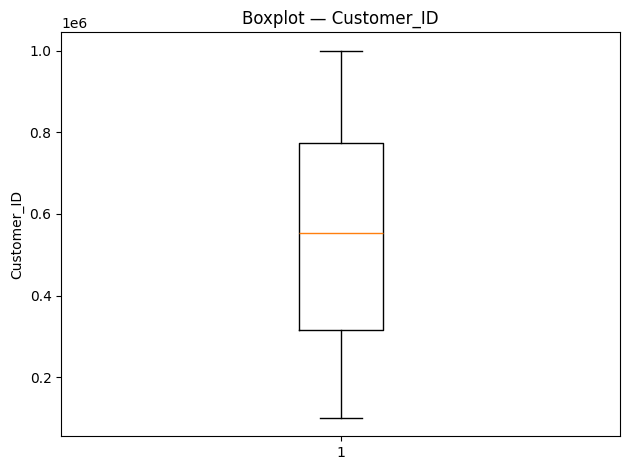

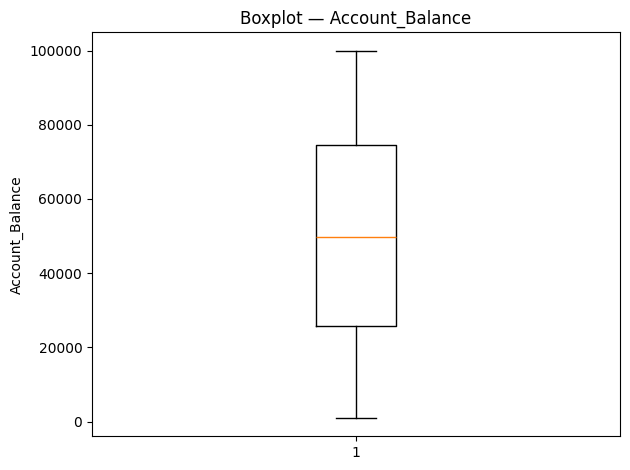

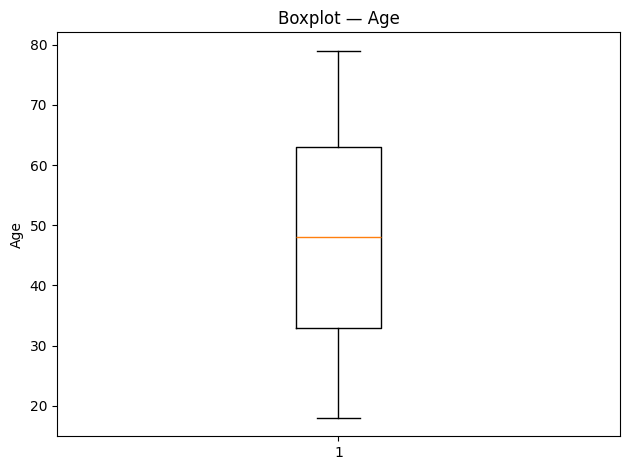

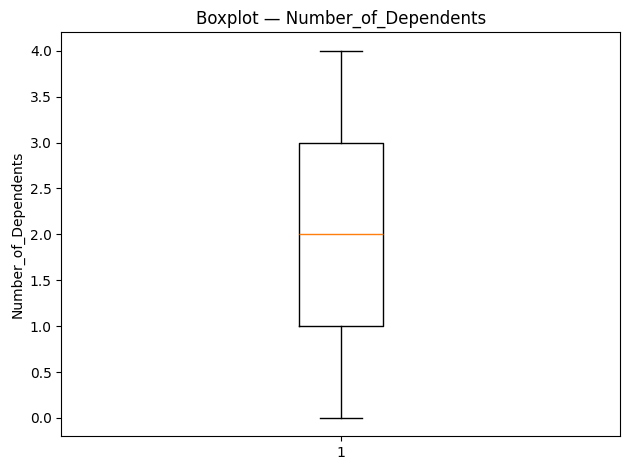

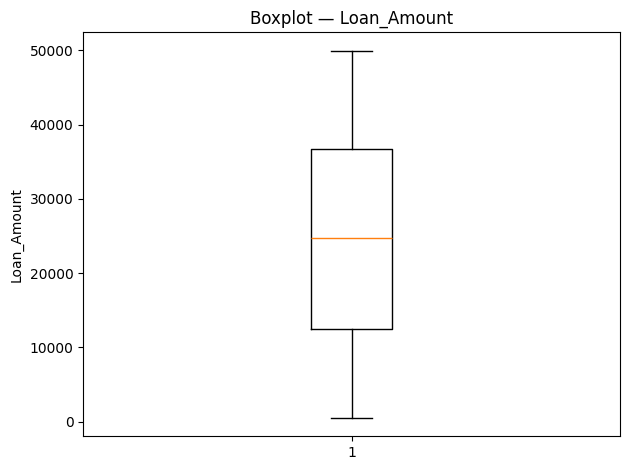

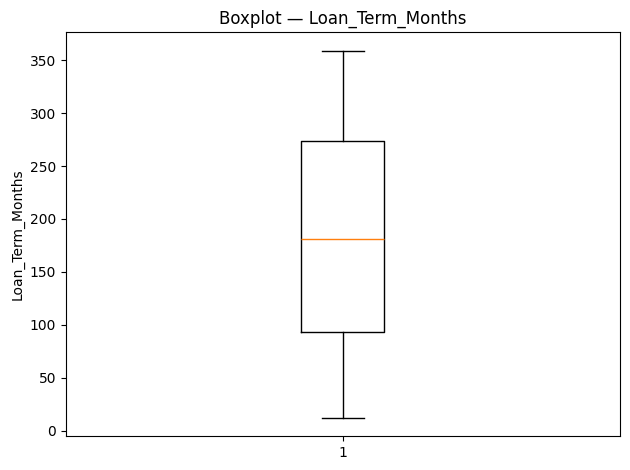

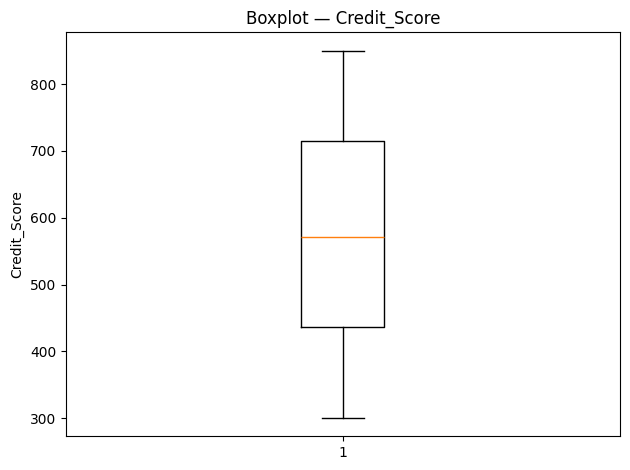

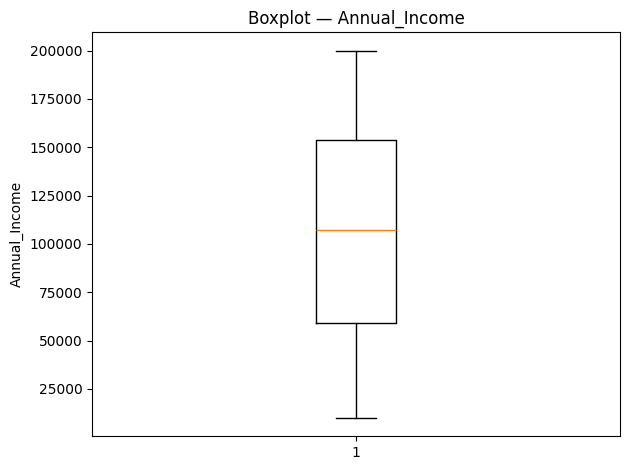

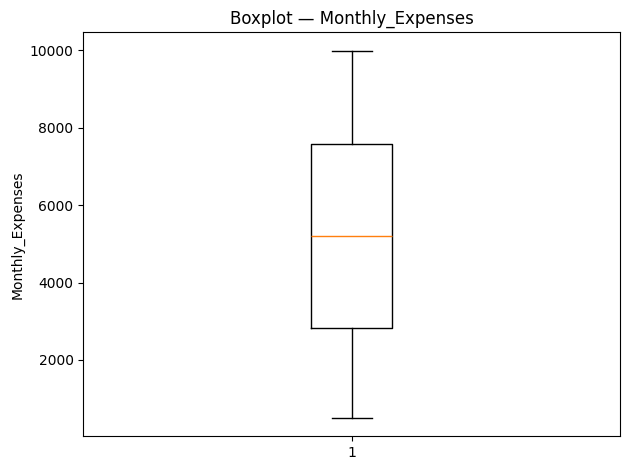

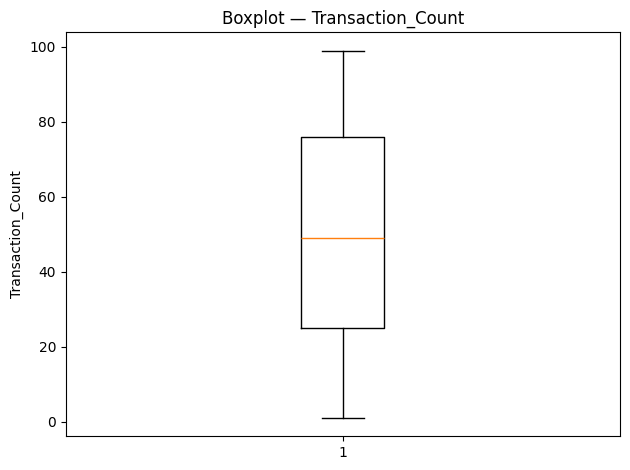

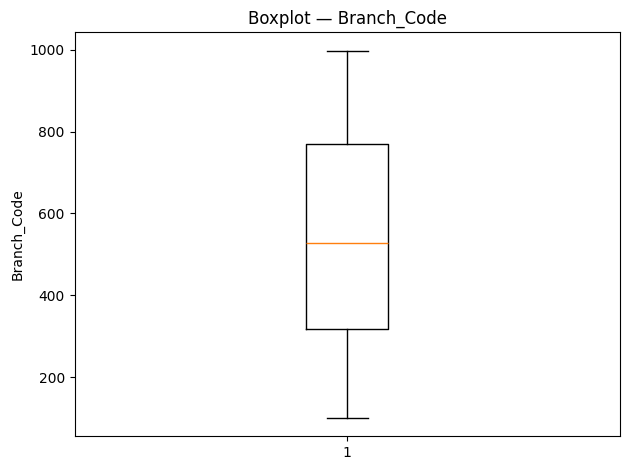

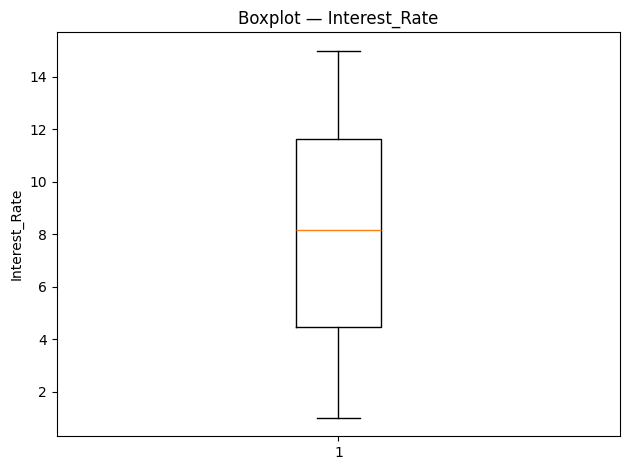

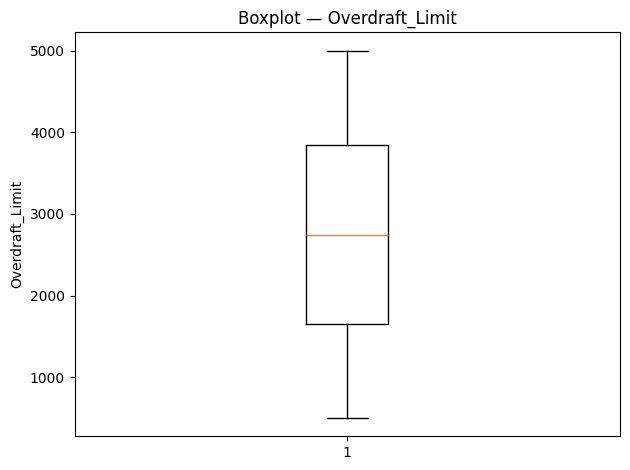

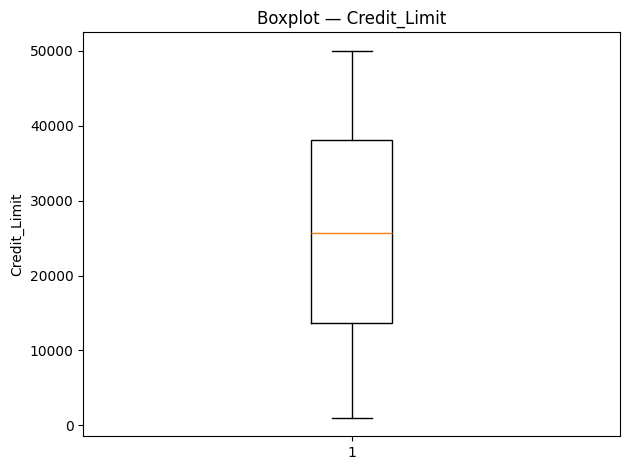

In [9]:
# Boxplots (one figure per column)
for col in numeric_cols[:20]:  # cap to first 20 to avoid too many figures in very wide datasets
    plt.figure()
    plt.boxplot(df[col].dropna().values, vert=True)
    plt.title(f'Boxplot — {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**Explanation**
- The 1.5×IQR criterion is a conventional rule-of-thumb to flag unusually extreme values.
- Boxplots provide a quick visual sense of distribution, central box (Q1–Q3), and potential outliers (points beyond whiskers).


## 8) Correlation Matrix (Numeric)

**What we’re doing**
- Computing the Pearson correlation matrix for numeric variables.
- Visualizing the matrix using `imshow` to identify strong positive/negative relationships.


Customer_ID  Account_Balance       Age  \
Customer_ID              1.000000         0.005465 -0.030630   
Account_Balance          0.005465         1.000000  0.010360   
Age                     -0.030630         0.010360  1.000000   
Number_of_Dependents    -0.031658        -0.042710  0.026420   
Loan_Amount              0.001511         0.004194  0.016353   
Loan_Term_Months         0.001453         0.005791 -0.008379   
Credit_Score             0.008255         0.026998  0.010812   
Annual_Income            0.018686         0.030579  0.011255   
Monthly_Expenses         0.000154         0.009884 -0.004861   
Transaction_Count        0.017506        -0.007471  0.034609   
Branch_Code             -0.006475        -0.003765 -0.000727   
Interest_Rate           -0.013356         0.001656  0.026549   
Overdraft_Limit          0.008962         0.010844  0.014617   
Credit_Limit             0.007975        -0.002253 -0.016195   

                      Number_of_Dependents  Loan_Amount  Loan_Term_Months  \
Customer_ID                      -0.031658     0.001511          0.001453   
Account_Balance                  -0.042710     0.004194          0.005791   
Age                               0.026420     0.016353         -0.008379   
Number_of_Dependents              1.000000     0.010189          0.023225   
Loan_Amount                       0.010189     1.000000          0.001219   
Loan_Term_Months                  0.023225     0.001219          1.000000   
Credit_Score                      0.036110    -0.015883         -0.017686   
Annual_Income                     0.010372    -0.000286          0.022708   
Monthly_Expenses                 -0.008048     0.013433         -0.033458   
Transaction_Count                -0.039314     0.030819         -0.012404   
Branch_Code                      -0.003194     0.009093          0.010506   
Interest_Rate                    -0.001232    -0.000105         -0.016965   
Overdraft_Limit                   0.017973     0.049951          0.002465   
Credit_Limit                      0.013879     0.005994         -0.014501   

                      Credit_Score  Annual_Income  Monthly_Expenses  \
Customer_ID               0.008255       0.018686          0.000154   
Account_Balance           0.026998       0.030579          0.009884   
Age                       0.010812       0.011255         -0.004861   
Number_of_Dependents      0.036110       0.010372         -0.008048   
Loan_Amount              -0.015883      -0.000286          0.013433   
Loan_Term_Months         -0.017686       0.022708         -0.033458   
Credit_Score              1.000000      -0.014765         -0.007297   
Annual_Income            -0.014765       1.000000         -0.004544   
Monthly_Expenses         -0.007297      -0.004544          1.000000   
Transaction_Count         0.011463       0.016122         -0.013550   
Branch_Code               0.016654      -0.020420          0.002364   
Interest_Rate             0.011962      -0.027208          0.009139   
Overdraft_Limit           0.025416      -0.005497         -0.033926   
Credit_Limit             -0.016523       0.008884         -0.018771   

                      Transaction_Count  Branch_Code  Interest_Rate  \
Customer_ID                    0.017506    -0.006475      -0.013356   
Account_Balance               -0.007471    -0.003765       0.001656   
Age                            0.034609    -0.000727       0.026549   
Number_of_Dependents          -0.039314    -0.003194      -0.001232   
Loan_Amount                    0.030819     0.009093      -0.000105   
Loan_Term_Months              -0.012404     0.010506      -0.016965   
Credit_Score                   0.011463     0.016654       0.011962   
Annual_Income                  0.016122    -0.020420      -0.027208   
Monthly_Expenses              -0.013550     0.002364       0.009139   
Transaction_Count              1.000000     0.016406      -0.006063   
Branch_Code                    0.016406     1.000000      

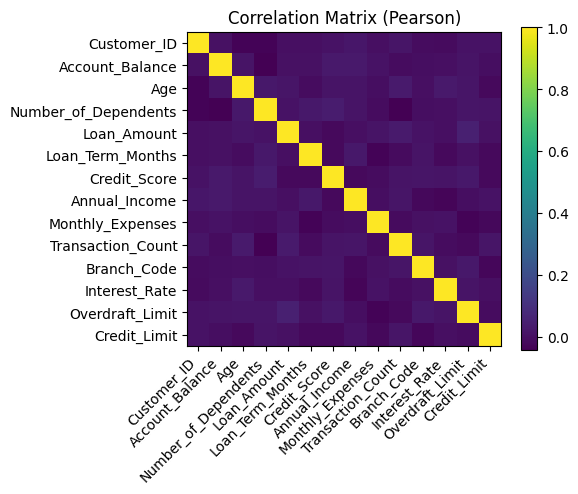

In [10]:
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr(numeric_only=True)
    display(corr)

    plt.figure(figsize=(6, 5))
    plt.imshow(corr.values, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title('Correlation Matrix (Pearson)')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a correlation matrix.")

**Explanation**
- The matrix shows pairwise linear correlation coefficients in [-1, 1].
- Large-magnitude values may indicate redundancy (multicollinearity) or interesting relationships for modeling.


## 9) Univariate Distributions

**What we’re doing**
- For **numeric** columns: plotting histograms to inspect shape (normality, skew, multimodality).
- For **categorical-like** columns: counting top categories to identify imbalance and long tails.


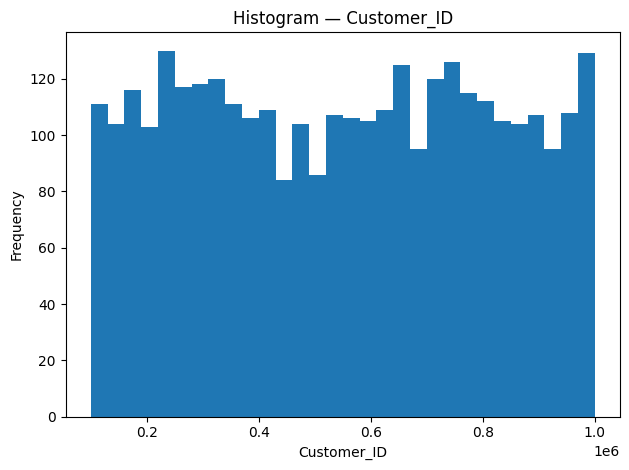

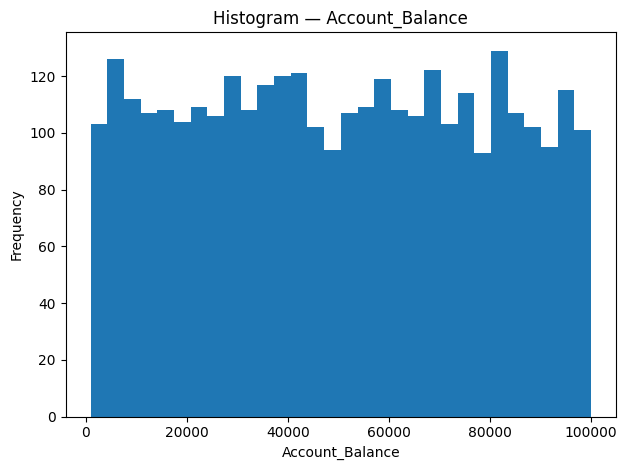

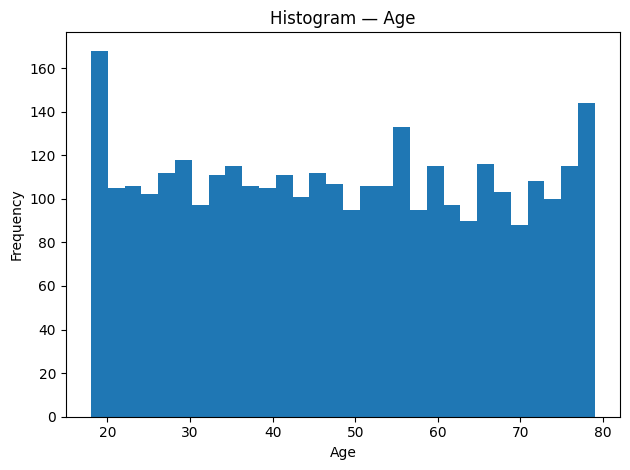

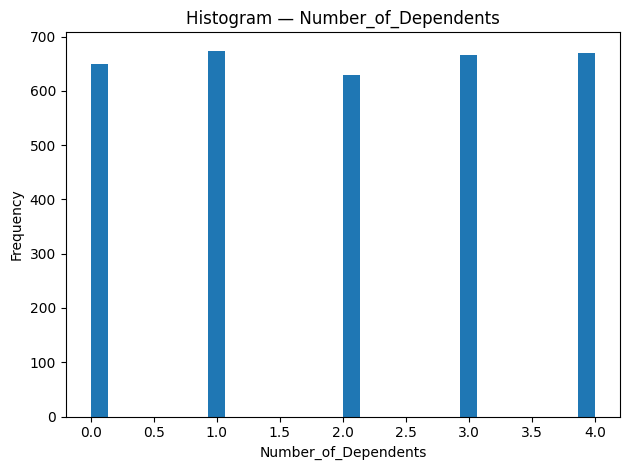

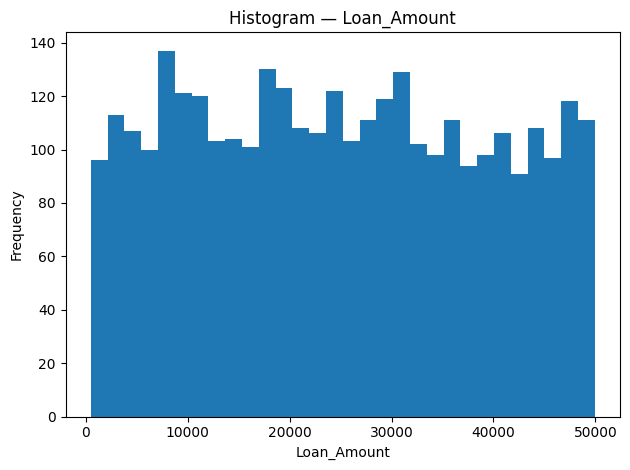

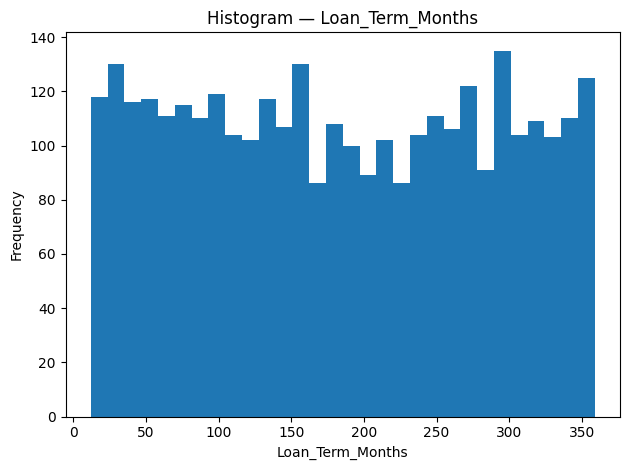

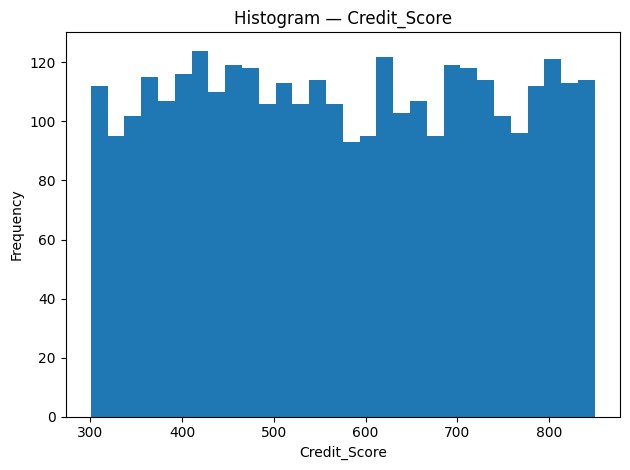

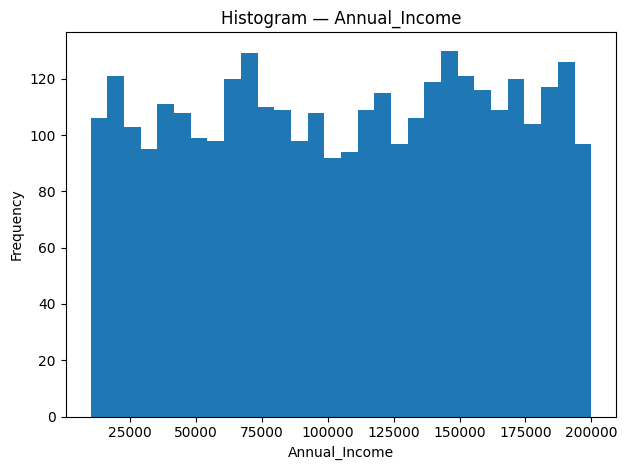

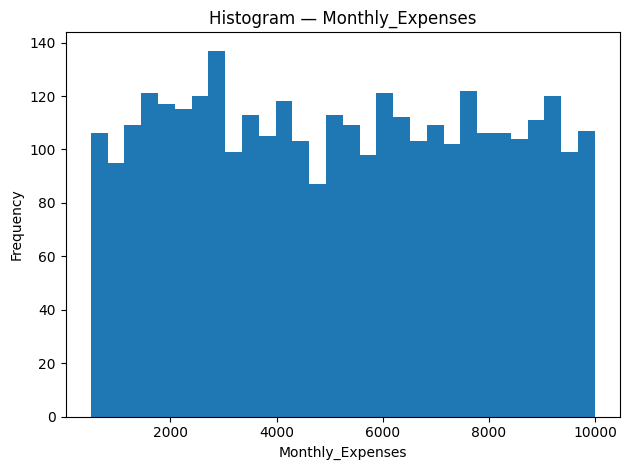

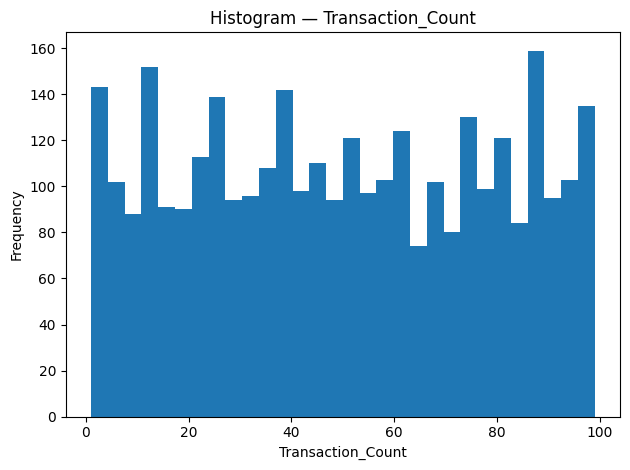

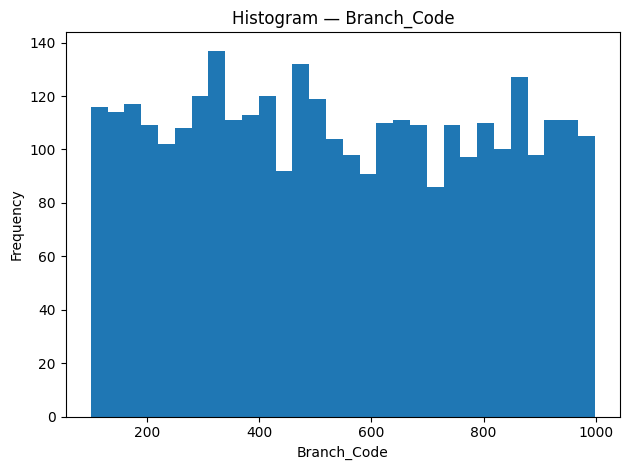

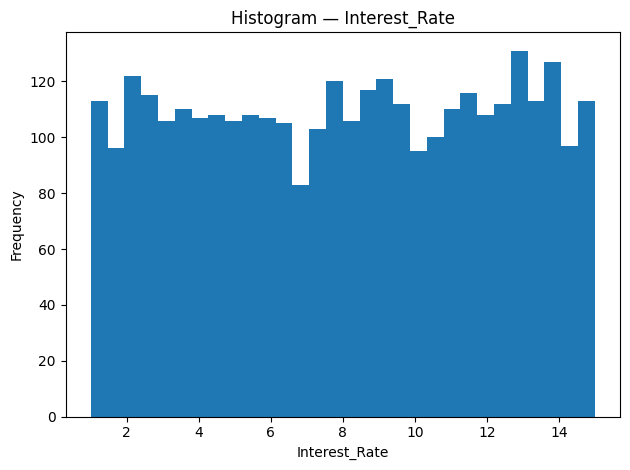

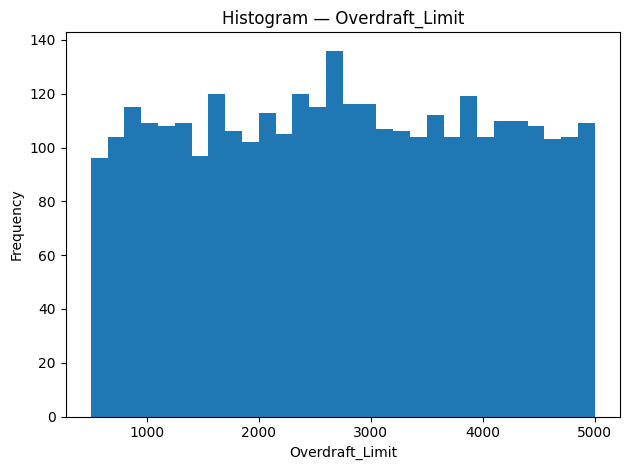

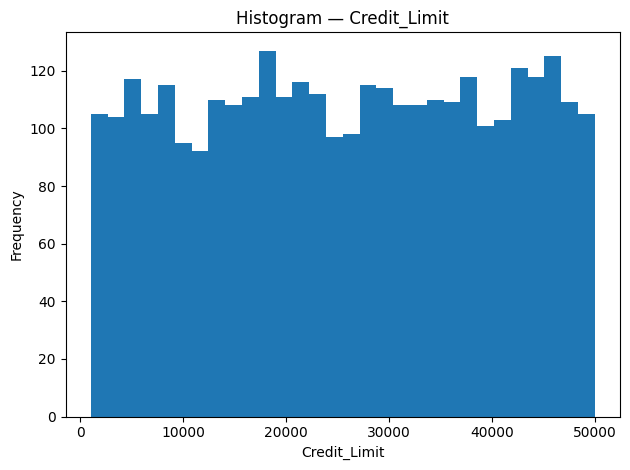

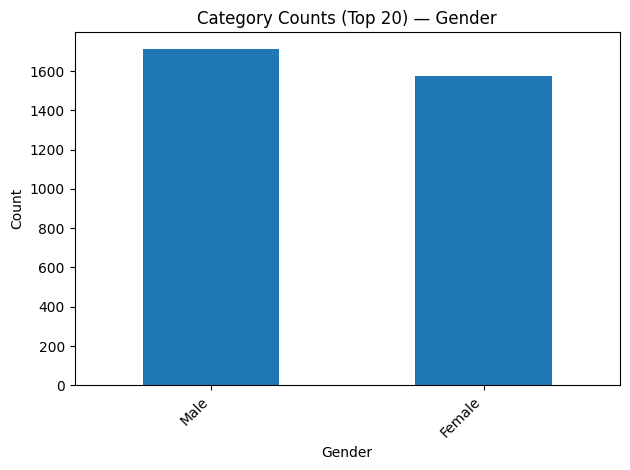

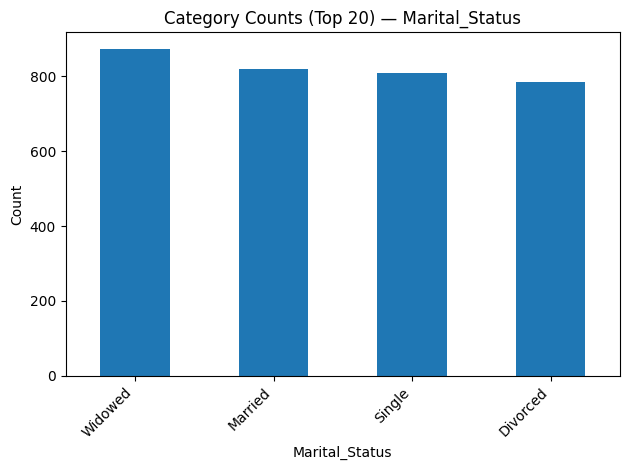

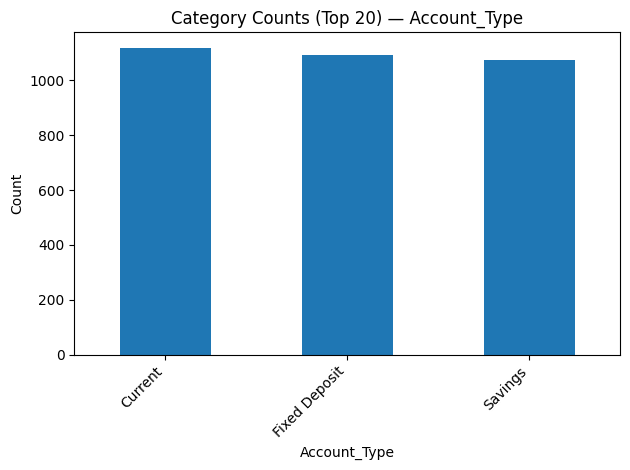

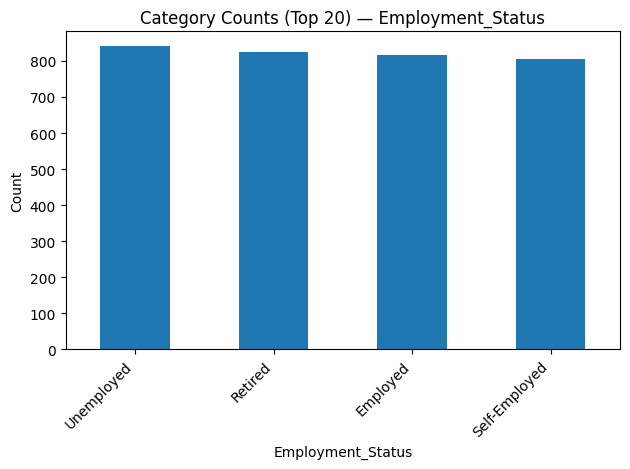

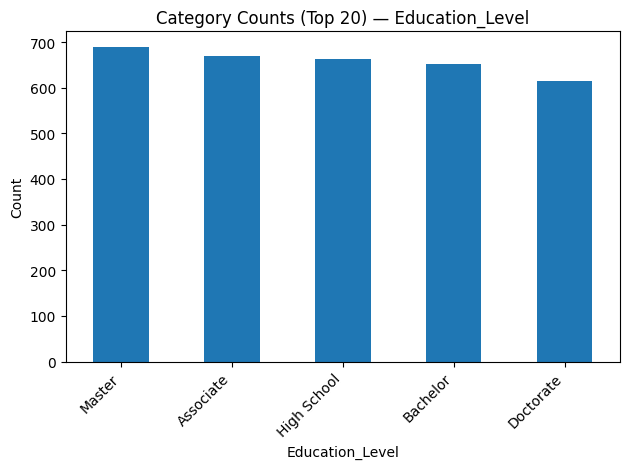

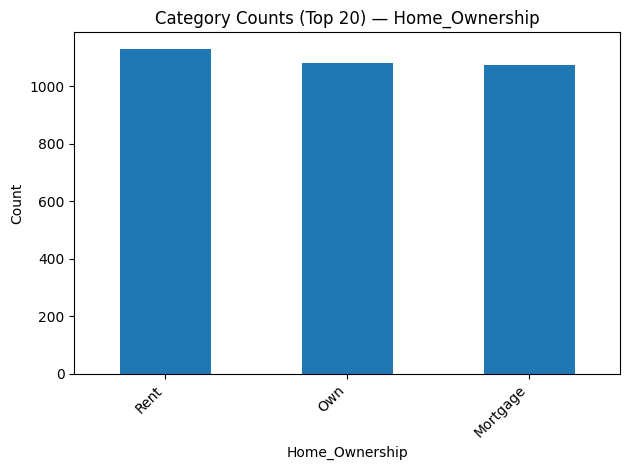

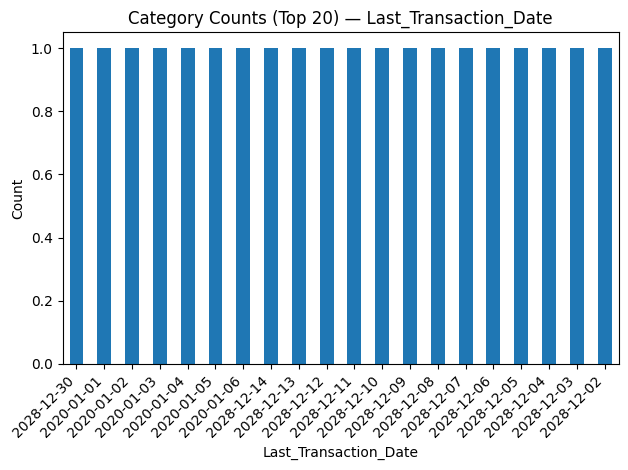

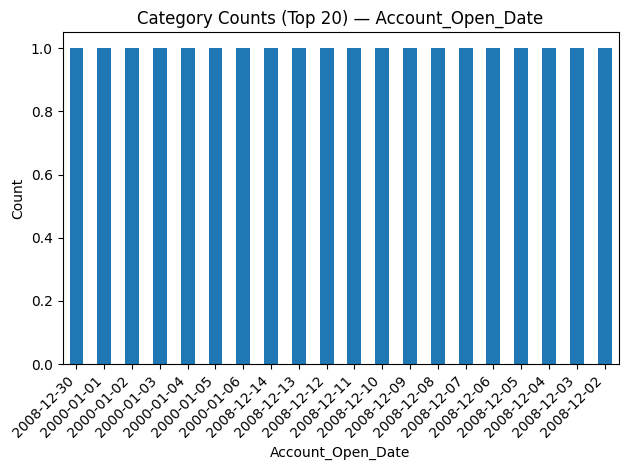

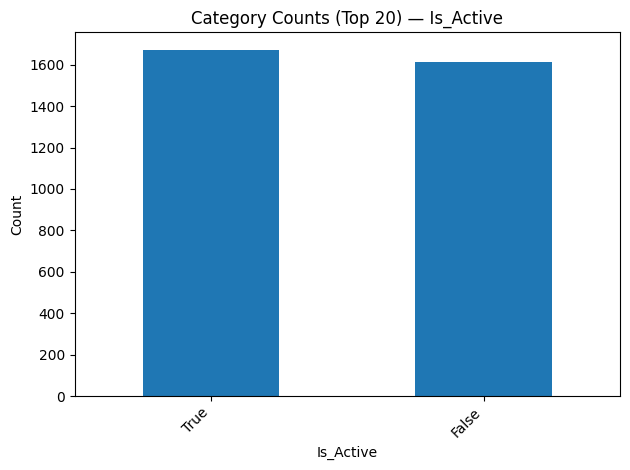

In [11]:
# Numeric histograms (one per column)
for col in numeric_cols[:20]:  # cap to avoid too many figures
    plt.figure()
    plt.hist(df[col].dropna().values, bins=30)
    plt.title(f'Histogram — {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Categorical bar charts (top 20 categories)
for col in categorical_cols[:15]:  # cap to avoid too many figures
    counts = df[col].astype('object').value_counts(dropna=False).head(20)
    plt.figure()
    counts.plot(kind='bar')
    plt.title(f'Category Counts (Top 20) — {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Explanation**
- Histograms highlight shape and spread; spikes, heavy tails, or gaps can be diagnostic.
- Bar charts for categoricals reveal imbalances and rare categories that might need grouping.


## 10) Bivariate Relationships (Numeric–Numeric)

**What we’re doing**
- Selecting up to a handful of numeric pairs and drawing scatter plots.
- This helps surface linear/nonlinear relationships and heteroscedasticity.


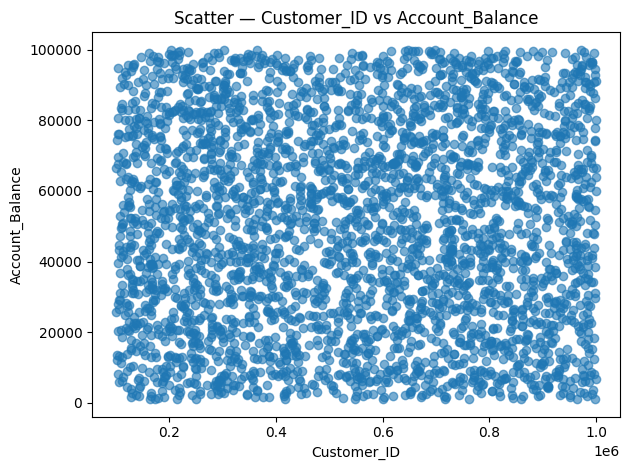

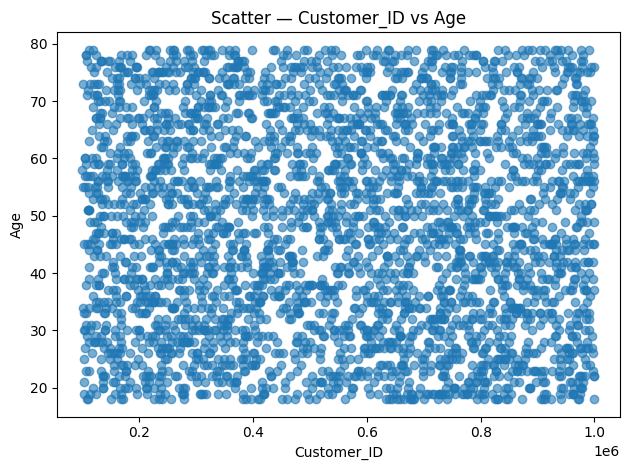

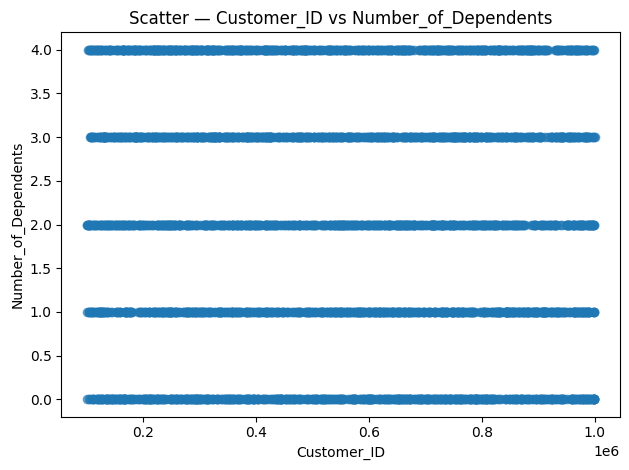

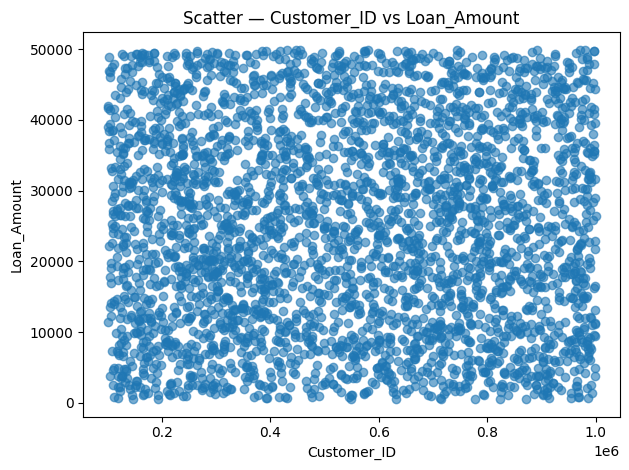

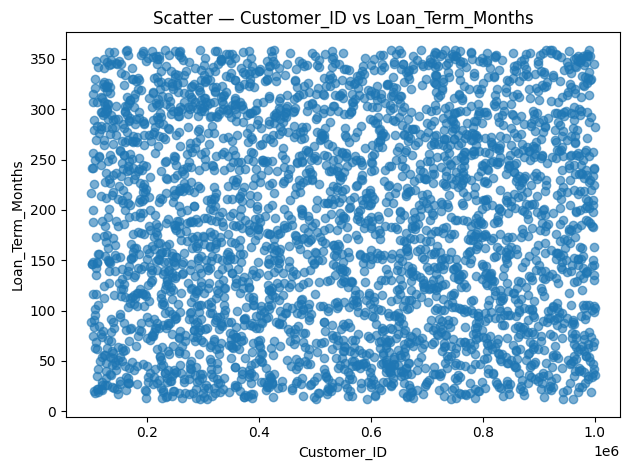

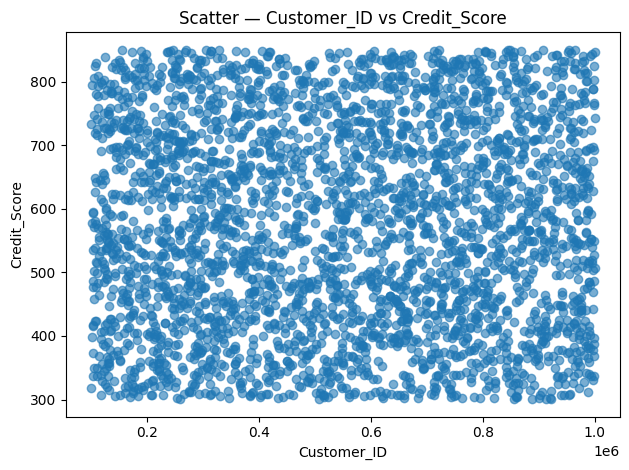

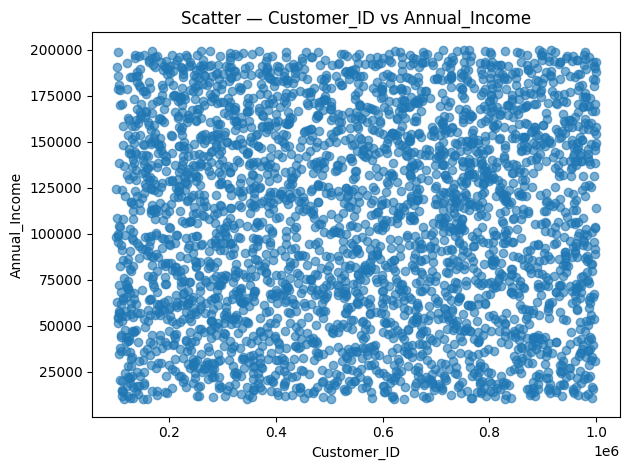

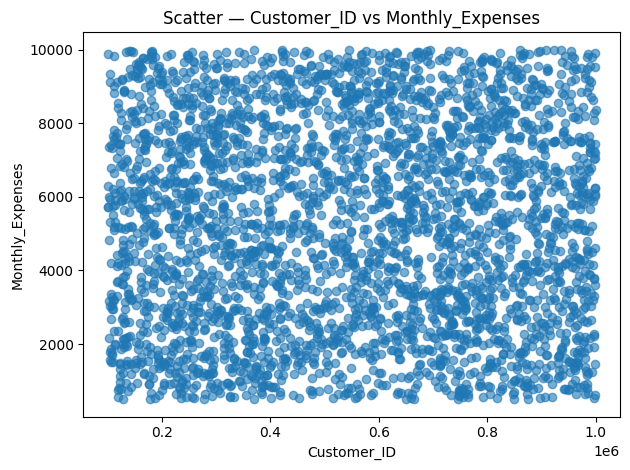

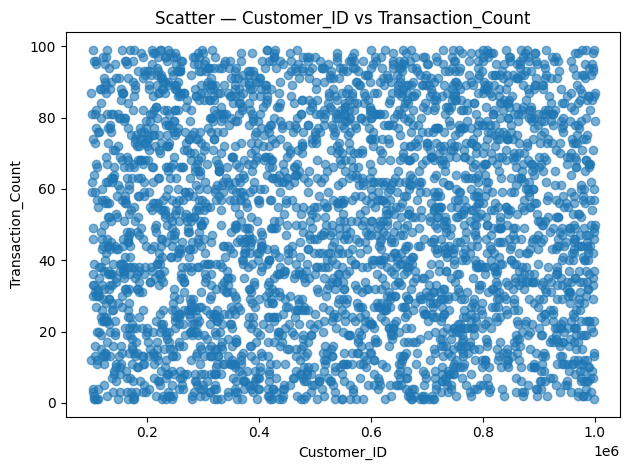

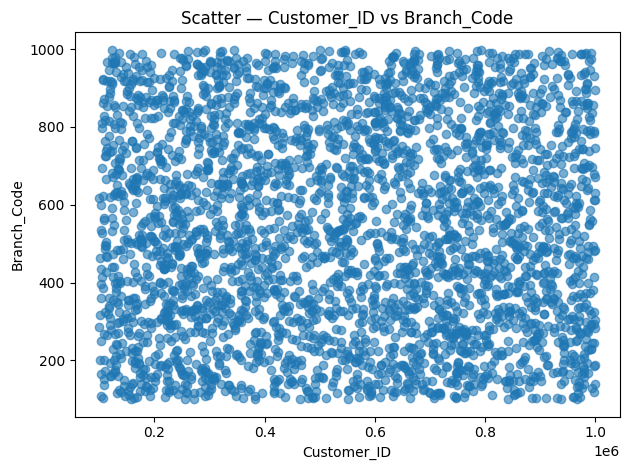

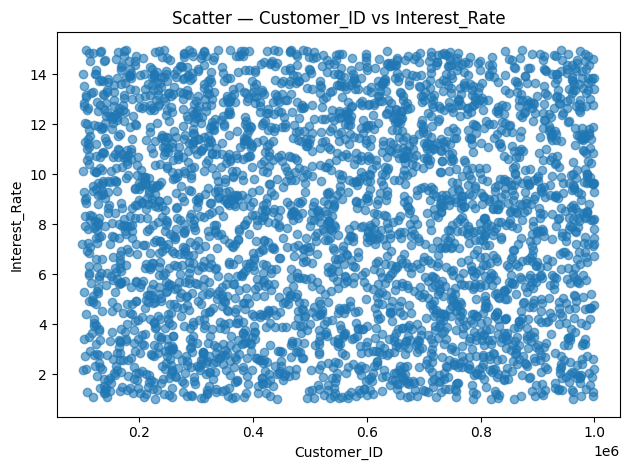

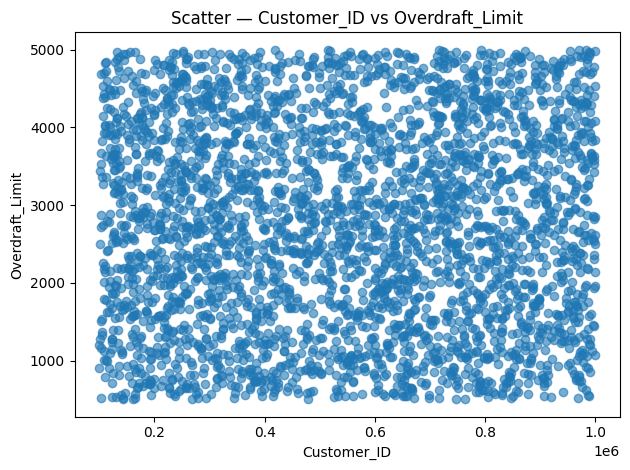

In [12]:
from itertools import combinations

pairs = list(combinations(numeric_cols, 2))[:12]  # limit number of figures
for x, y in pairs:
    plt.figure()
    plt.scatter(df[x].values, df[y].values, alpha=0.6)
    plt.title(f'Scatter — {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

if not pairs:
    print("Not enough numeric columns to form pairs.")

**Explanation**
- Scatter plots show how one variable behaves versus another.
- Nonlinear shapes or clusters may suggest useful feature engineering or segmentation.


## 11) Optional Target/Outcome Analysis (Auto-detection)

**What we’re doing**
- Trying to automatically detect a likely target column (e.g., `y`, `target`, `label`, `deposit`, `default`).
- If detected:
  - Show class balance.
  - Compare numeric features by target via group means.
  - Simple bars to visualize differences.


Target column guess: Gender


count
Gender       
Male     1712
Female   1575

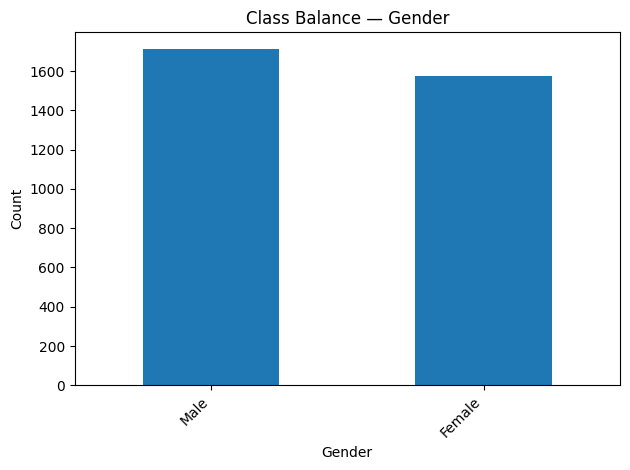

Customer_ID  Account_Balance        Age  Number_of_Dependents  \
Gender                                                                    
Female  549057.131429     49456.085293  47.912381              2.029841   
Male    549649.643692     50606.918608  48.279790              1.991238   

         Loan_Amount  Loan_Term_Months  Credit_Score  Annual_Income  \
Gender                                                                
Female  24721.045206        184.660952    578.912821  106358.858671   
Male    25040.171085        182.312500    572.243397  106107.190527   

        Monthly_Expenses  Transaction_Count  Branch_Code  Interest_Rate  \
Gender                                                                    
Female        5181.90173          49.699048   544.891429       8.094806   
Male          5246.02107          49.934579   538.029206       8.040921   

        Overdraft_Limit  Credit_Limit  
Gender                                 
Female      2727.070884  25584.035614  
Male        2777.144082  25903.918912

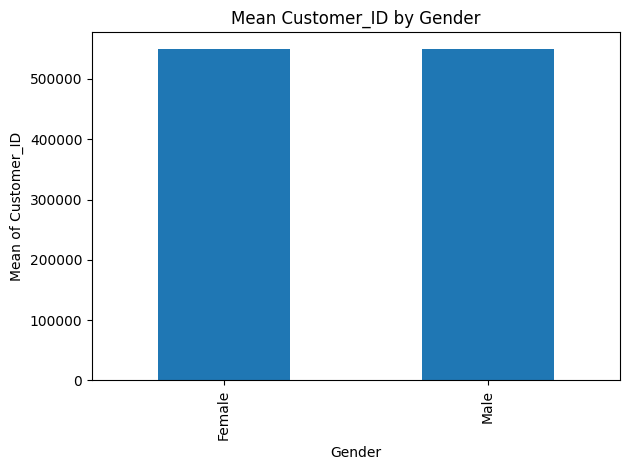

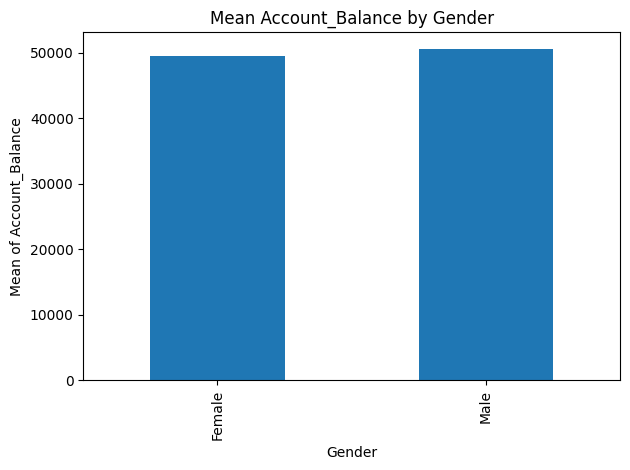

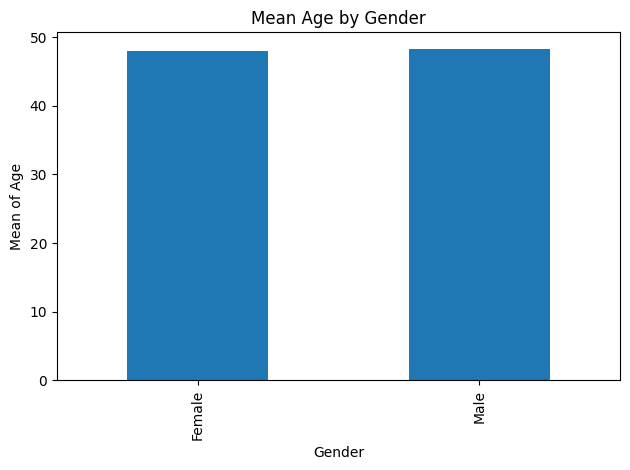

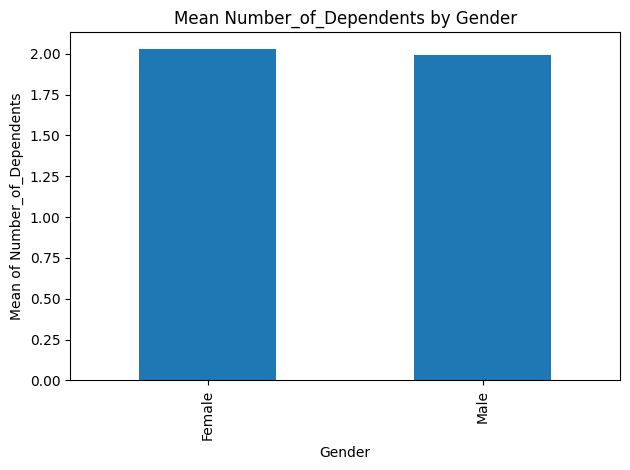

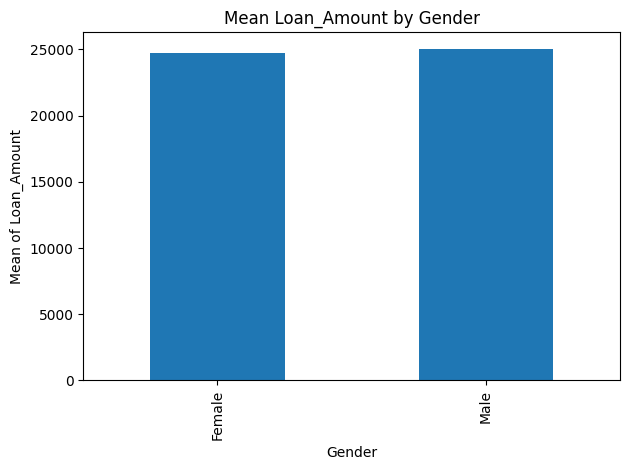

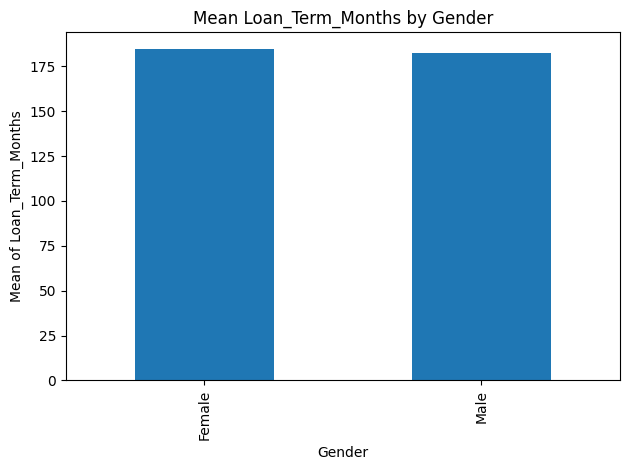

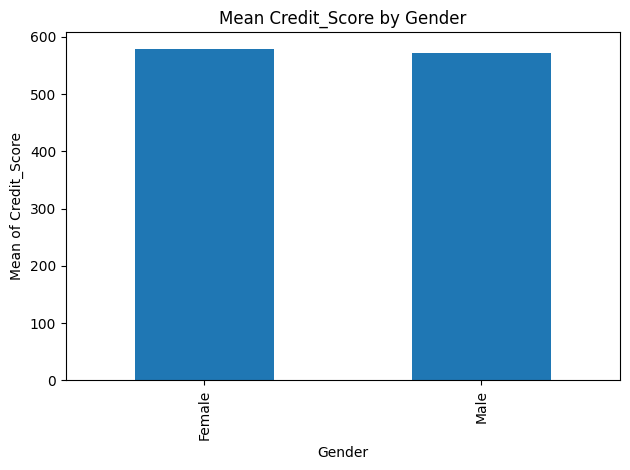

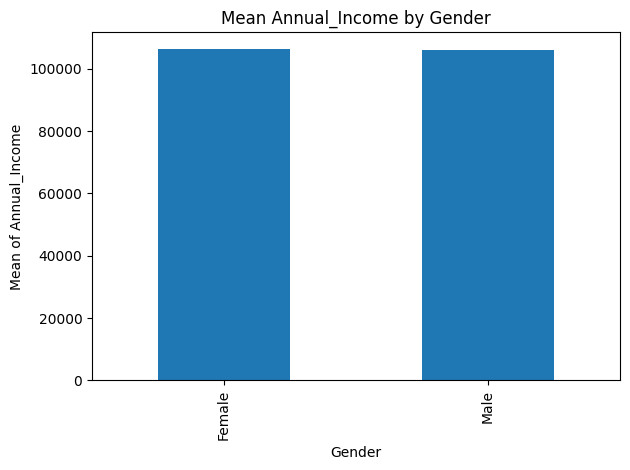

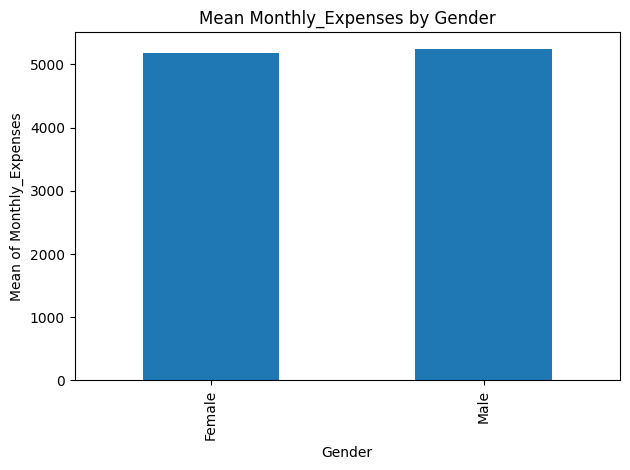

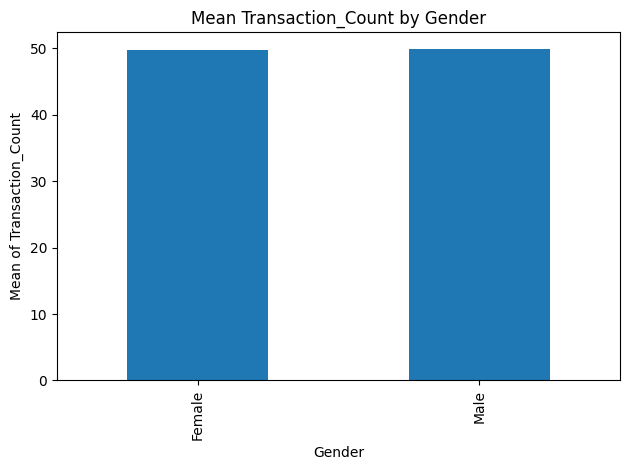

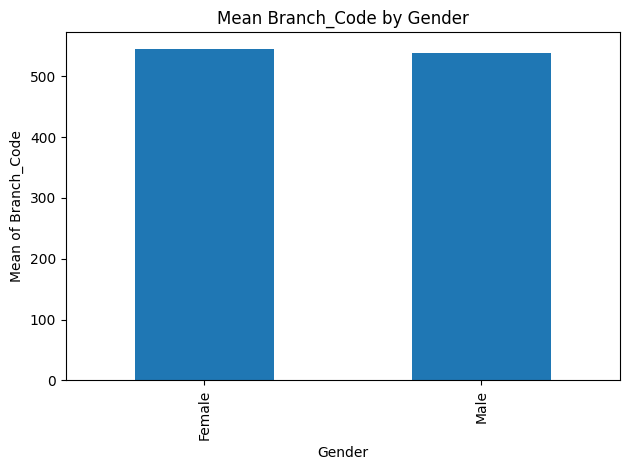

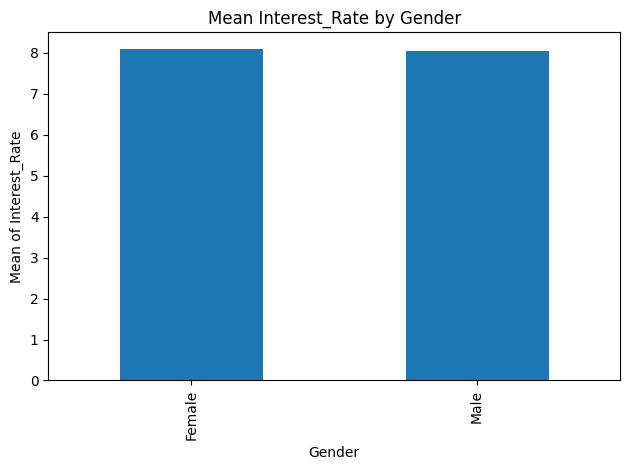

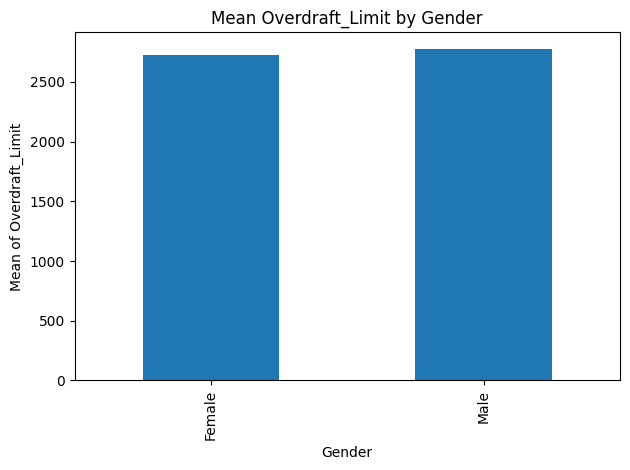

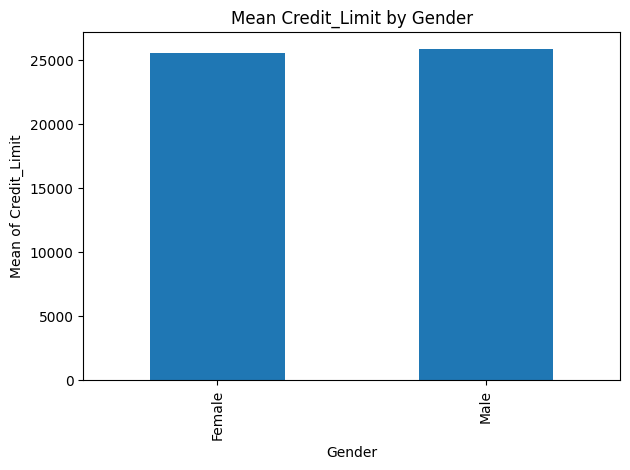

In [13]:
# Heuristic target detection
possible_names = {'y','target','label','deposit','default','outcome','class'}
cand = [c for c in df.columns if c.lower() in possible_names]

target_col = None
if cand:
    target_col = cand[0]
else:
    # Fallback: any boolean or object with <= 5 unique values
    for c in df.columns:
        nun = df[c].nunique(dropna=True)
        if df[c].dtype in [bool, 'bool'] or (df[c].dtype=='object' and nun <= 5):
            target_col = c
            break

print("Target column guess:", target_col)

if target_col is not None:
    # Class balance
    counts = df[target_col].value_counts(dropna=False)
    display(counts.to_frame('count'))
    plt.figure()
    counts.plot(kind='bar')
    plt.title(f'Class Balance — {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Numeric means by target
    if numeric_cols:
        group_means = df.groupby(target_col)[numeric_cols].mean(numeric_only=True)
        display(group_means)

        # Plot first 15 numeric columns
        for col in numeric_cols[:15]:
            plt.figure()
            group_means[col].plot(kind='bar')
            plt.title(f'Mean {col} by {target_col}')
            plt.xlabel(target_col)
            plt.ylabel(f'Mean of {col}')
            plt.tight_layout()
            plt.show()
else:
    print("No obvious target column detected. You can set one manually if needed.")

**Explanation**
- We guess a likely target column by name or by low-cardinality type.
- If found, we check **class balance** and the **mean of numeric features by class** to spot separable signals.


## 12) Quick Data Quality & Cleaning Ideas

**What we’re doing**
- Summarizing potential next steps based on EDA findings.
- This is a checklist, not automatic transformations (keep EDA read-only).


**Possible next steps**
- Handle missing values: impute (mean/median for numeric; mode or “Unknown” for categoricals) or drop if appropriate.
- Address outliers: cap/floor with domain thresholds or winsorize; validate whether they are valid extremes.
- Reduce cardinality: group rare categories (e.g., lump into “Other”) to stabilize models.
- Encode categoricals: one-hot, ordinal, or target encoding depending on model type.
- Normalize/standardize numeric features if required for downstream methods.
- Date features: extract year/month/weekday, compute durations, or detect seasonality.
- Feature selection: remove constant or highly collinear features.
- Train/validation design: ensure proper temporal splits if time-dependent.


## 13) Save Notebook & Environment Versions

**What we’re doing**
- Saving this notebook to disk so it can be shared or rerun.
- Capturing library versions for reproducibility.


In [14]:
import sys, platform
import pkgutil

# Save this notebook (no-op when running as a .ipynb already generated)
# This cell is here for completeness; the creator script handles actual writing.

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

Python: 3.12.11
NumPy: 2.0.2
Pandas: 2.2.2
Matplotlib: 3.10.0
